In [0]:
# 1. Prepare Problem
# a) Load libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
# b) Load dataset

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('Iris Flower/Dataset/iris.data', names=names)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# 2. Summarize Data
# a) Descriptive statistics

# shape
print(df.shape)

(150, 5)


In [9]:
# head
print(df.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [11]:
# descriptions
print(df.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:
# class distribution
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


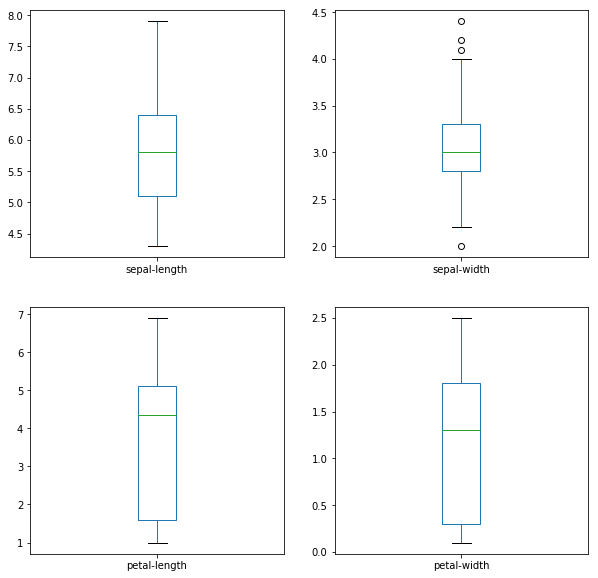

In [25]:
# b) Data visualizations

# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10), sharex=False, sharey=False)
plt.show()

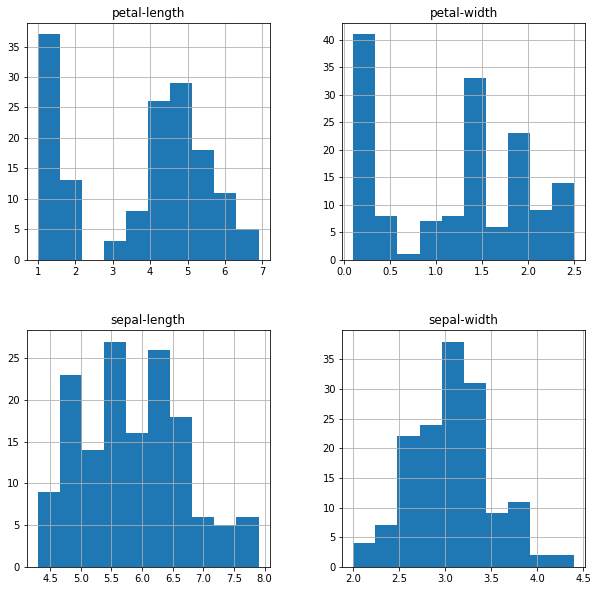

In [27]:
# histograms
df.hist(layout=(2,2), figsize=(10,10))
plt.show()

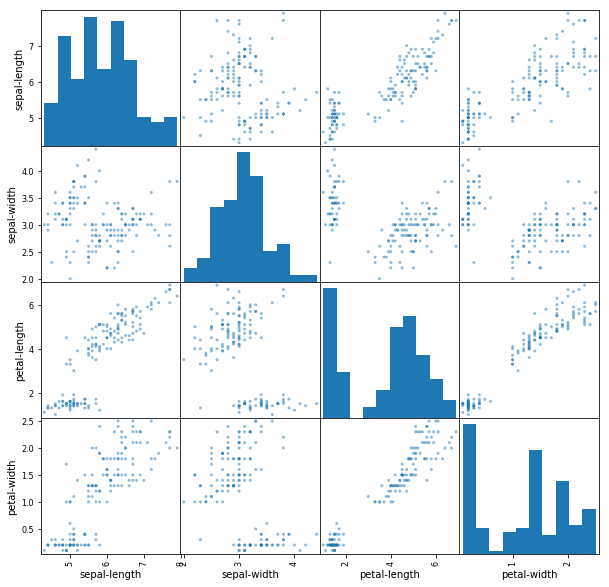

In [29]:
# scatter plot matrix
scatter_matrix(df, figsize=(10,10))
plt.show()

In [0]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset

array = df.values
X = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

In [36]:
# b) Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())


LR 0.9833333333333332 0.03333333333333335
LDA 0.975 0.03818813079129868
KNN 0.9833333333333332 0.03333333333333335
CART 0.975 0.03818813079129868
NB 0.975 0.053359368645273735
SVM 0.9833333333333332 0.03333333333333335


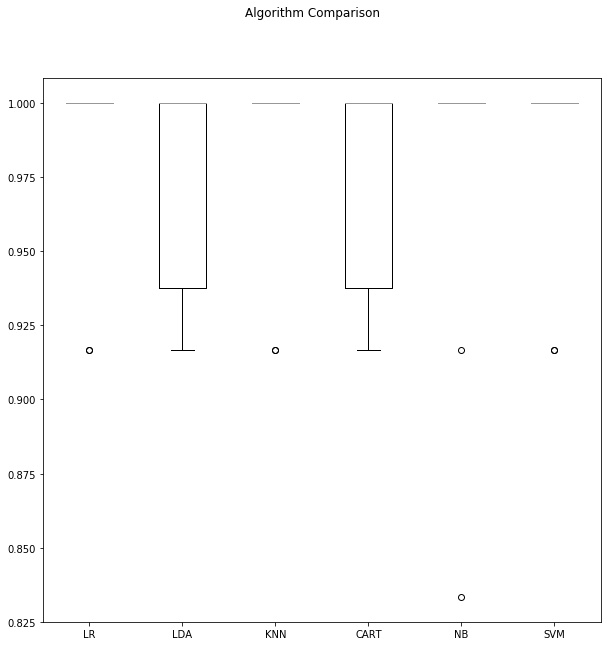

In [38]:
# c) Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:
# 5. Finalize Model
# a) Predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(y_validation, predictions))

0.9


In [41]:
print(confusion_matrix(y_validation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [42]:
print(classification_report(y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

